# Exemplo - Multilayer Perceptron com TensorFlow
## Aprendizagem supervisionada
### Problema de Regressão: Qualidade de vinho tinto
<div>

<img src="https://images.unsplash.com/photo-1630369160812-26c7604cbd8c?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=688&q=80" width="200" height="200" />
<img src="https://www.foodandwine.com/thmb/B6XvMMR6r9OcAETGgp2ypqK_-wI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/red-wine-blends-FT-MAG1116-2000-4f3c3e91bcd646ea8a21f2152746ef53.jpg" width="200" height="200" />
 </div>

---

O modelo receberá como entrada as seguintes características de vinho tinto:

  - acidez fixa
  - acidez volátil
  - Ácido Cítrico
  - açúcar residual
  - cloretos
  - dióxido de enxofre livre
  - dióxido de enxofre total
  - densidade
  - pH
  - sulfatos
  - álcool

e irá prever a qualidade do vinho.

Portanto, o modelo será um modelo de regressão, que possui onze parâmetros e uma saída. A saída é contínua e pode assumir qualquer valor entre 0 e 10.

## 1. Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## 2. Carregando dataset

In [2]:
# Load data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 2.1. Dividindo o dataset em atributos e saída desejada

In [4]:
X = df.drop('quality', axis=1)
y =  df['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Scale data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Criando o modelo

In [6]:
# Build model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

### 4.1. Compilando e treinando o modelo

In [7]:
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 21.0353 - val_loss: 3.4255
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.2985 - val_loss: 2.2469
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9691 - val_loss: 1.9410
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8246 - val_loss: 1.7262
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4586 - val_loss: 1.5469
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4060 - val_loss: 1.3944
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2571 - val_loss: 1.2603
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0405 - val_loss: 1.1459
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9710 - val_loss: 1.0390
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8067 - val_loss: 0.9513
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8308 - val_loss: 0.8630
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0

In [8]:
# Evaluate model

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(y_pred.shape[0])

print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
MSE:  0.4200769919182733
R2:  0.35719475825354263


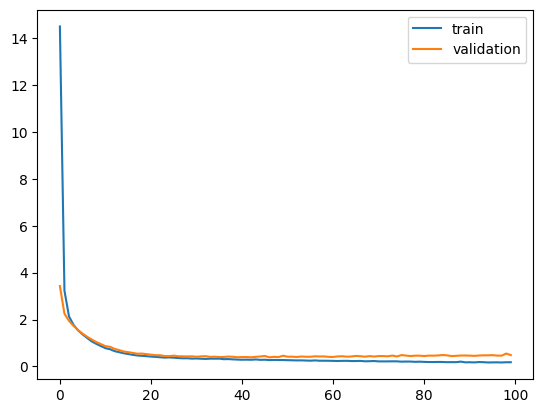

In [9]:
# Plot loss

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()


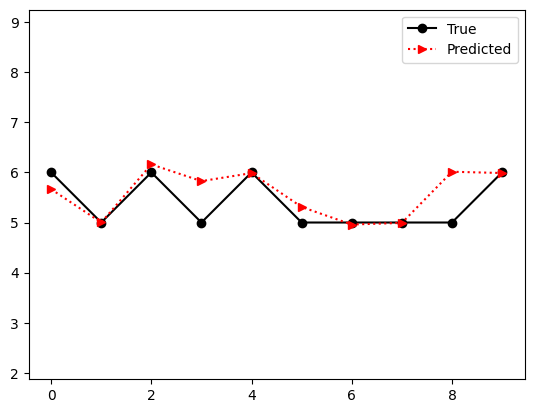

In [10]:
plt.plot(y_test[0:10], '-o', color='black')
plt.plot(y_pred[0:10], ':>', color='red')
plt.axis('equal')
plt.legend(['True', 'Predicted'])

In [11]:
# teste
new_data_point = np.array([[7.4 ,	0.70, 	0.00, 	1.9 ,	0.076 ,	11.0 ,	34.0, 	0.9978, 	3.51 ,	0.56 	,9.4]])


new_data_point_scaled = scaler.transform(new_data_point)

# Predict the quality of the new data point using the trained model
predicted_quality = model.predict(new_data_point_scaled)

# Print the predicted quality
print("Predicted quality:", int(predicted_quality[0]))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Predicted quality: 5


<ipython-input-11-4175b9a76c6d>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted quality:", int(predicted_quality[0]))


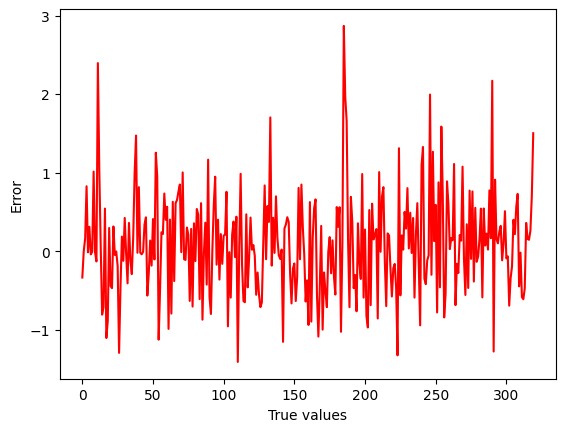

In [12]:
# Plot error distribution
error = y_pred - y_test
plt.plot(error, '-', color='red')
plt.xlabel('True values')
plt.ylabel('Error')
plt.show()


In [13]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.5 MB/s eta 0:00:00


In [17]:
# convert to dataframe X_train
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [42]:
# Explain the model with shap
import shap

# chooses the best SHAP explainer based on the model type
explainer = shap.Explainer(model.predict, X_train_df)

In [68]:

# Select a subset of the data to explain
X_sample = X_test_df.sample(10)

# Calculate SHAP values
shap_values = explainer.shap_values(X_sample)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━

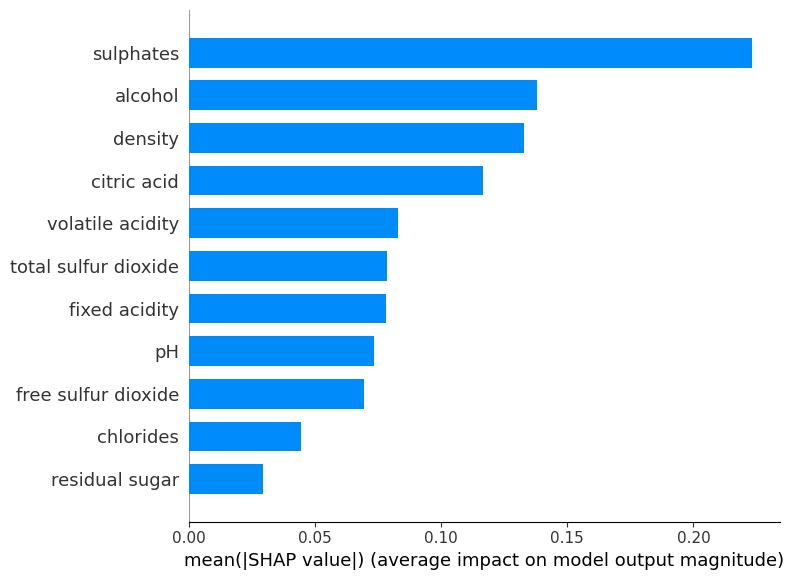

In [44]:
shap.summary_plot(shap_values, X_sample, plot_type="bar", feature_names=X.columns)

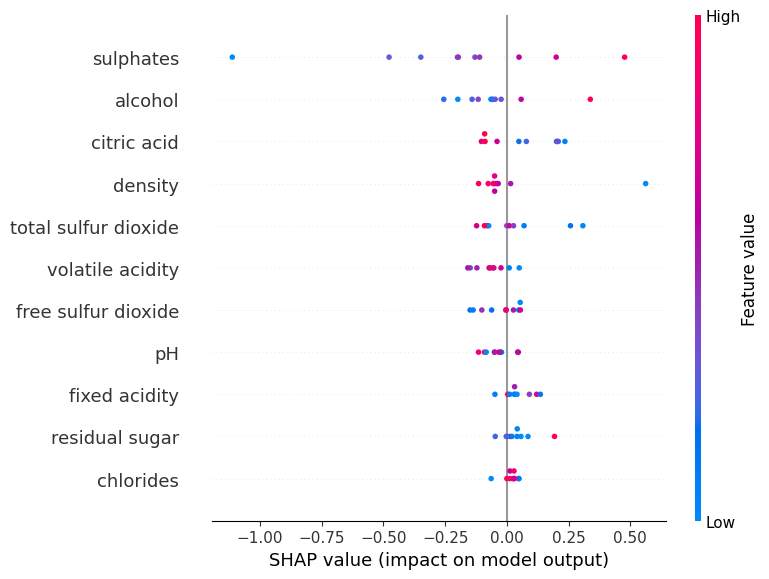

In [71]:
shap.summary_plot(shap_values, X_sample, feature_names=X.columns)

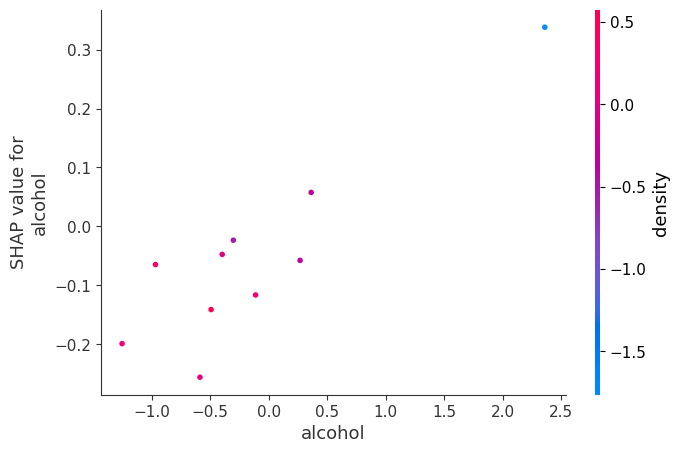

In [75]:
# How the features alcohol values are impacting in wine quality
shap.dependence_plot("alcohol", shap_values, X_sample, interaction_index="density")


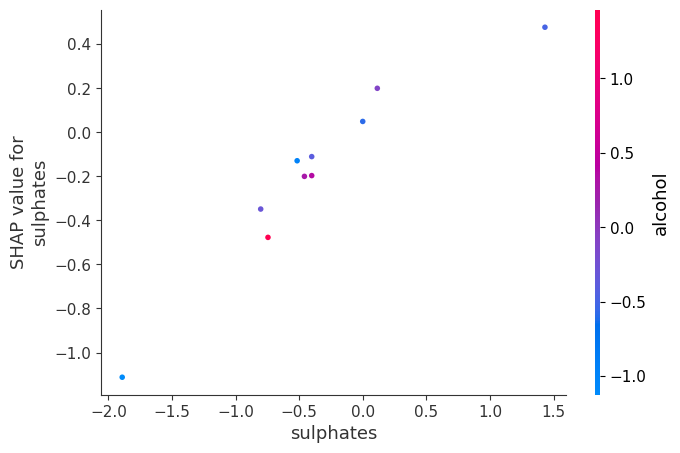

In [83]:
# how the sulphates are impacting
shap.dependence_plot("sulphates", shap_values, X_sample, interaction_index="alcohol")